In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
from astropy.wcs import WCS
from IPython.display import HTML

In [2]:
plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams['animation.html'] = 'jshtml'

In [3]:
fits_file = "supernovae/tess-s0001-4-1_64.525833_-63.615669_100x100_astrocut.fits"

In [4]:
sn = tess_cpm.Source(fits_file, remove_bad=True)

Removing 15 bad data points (out of 1282) using the TESS provided QUALITY array


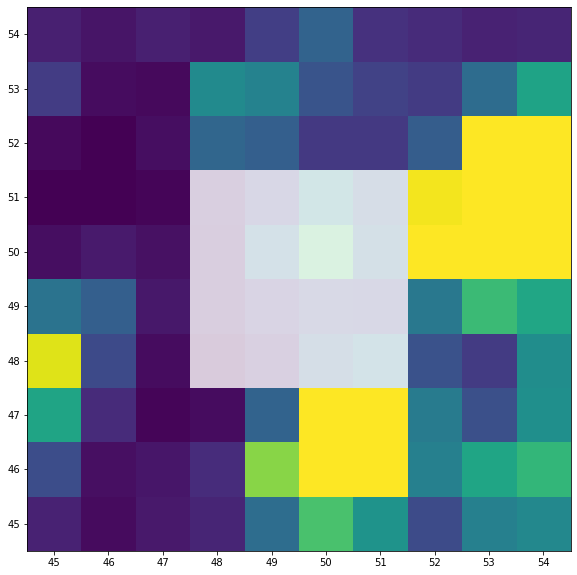

In [5]:
sn.set_aperture(rowrange=[48, 52], colrange=[48, 52])
sn.plot_cutout(rowrange=[45, 55], colrange=[45, 55], show_aperture=True)

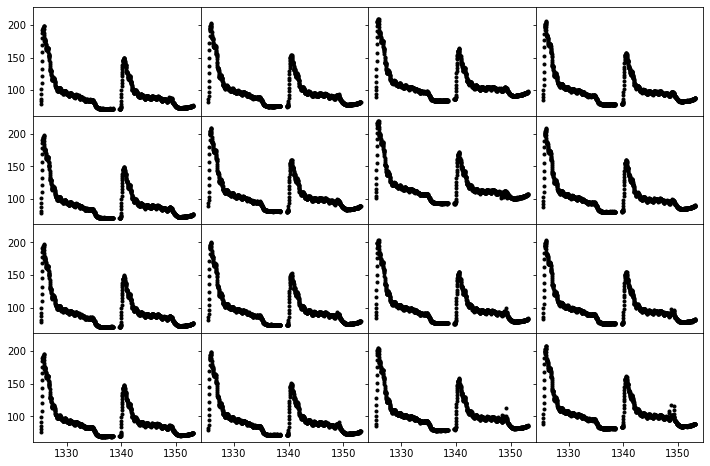

In [6]:
sn.plot_pix_by_pix(data_type="raw")

In [7]:
sn.add_cpm_model()
sn.add_poly_model()
sn.set_regs([0.001, 0.1])
sn.holdout_fit_predict(k=50);

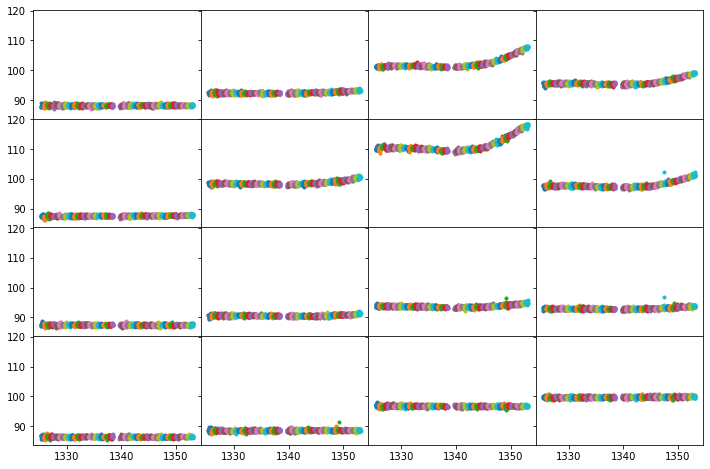

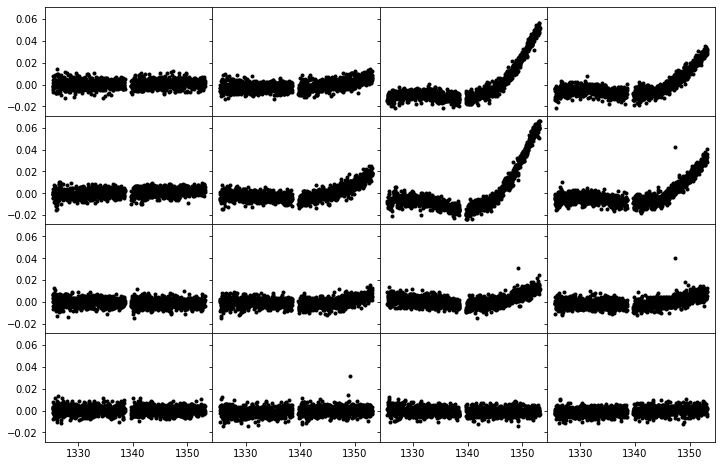

In [8]:
sn.plot_pix_by_pix(data_type="rescaled_cpm_subtracted_flux", split=True)
sn.plot_pix_by_pix(data_type="cpm_subtracted_flux")

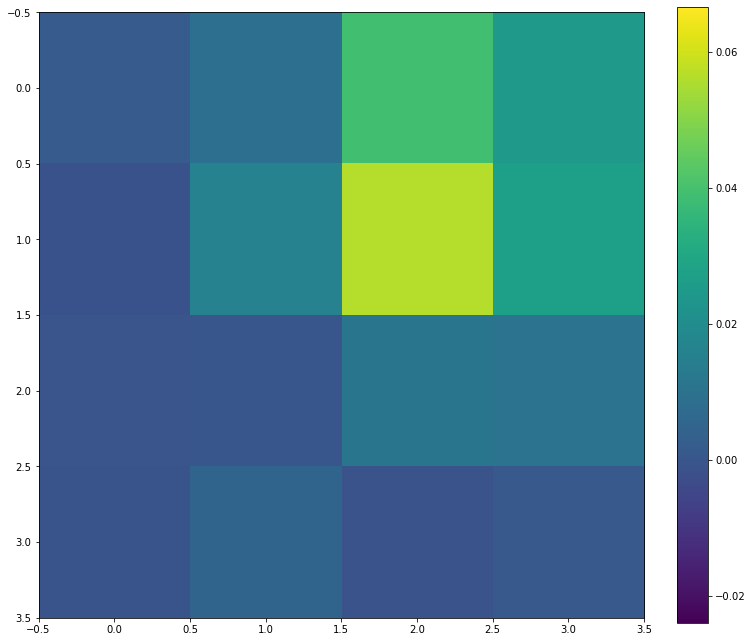

In [9]:
ani = sn.make_animation(thin=100)
HTML(ani.to_jshtml())

In [10]:
flux = sn.get_aperture_lc(data_type="normalized_flux")
cpm_prediction = sn.get_aperture_lc(data_type="cpm_prediction")
poly_prediction = sn.get_aperture_lc(data_type="poly_model_prediction")
apt_lc = sn.get_aperture_lc(data_type="rescaled_cpm_subtracted_flux")

Summing over 4 x 4 pixel lightcurves
Summing over 4 x 4 pixel lightcurves
Summing over 4 x 4 pixel lightcurves
Summing over 4 x 4 pixel lightcurves


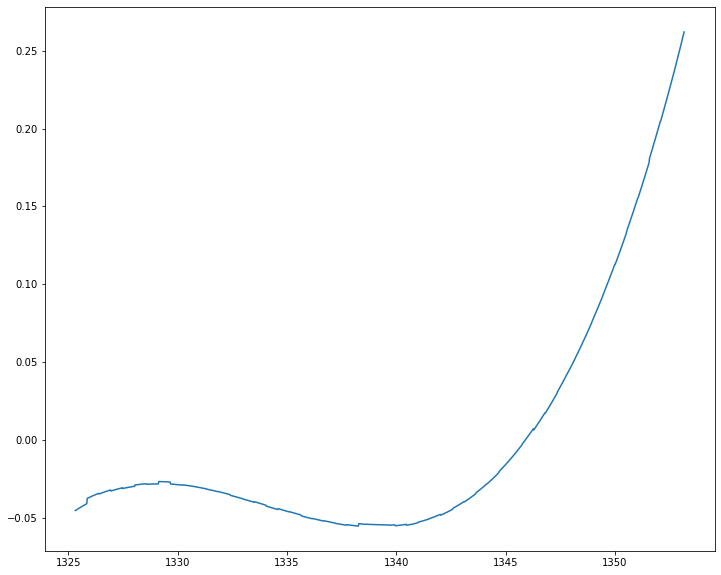

In [11]:
# plt.plot(sn.time, flux)
# plt.plot(sn.time, cpm_prediction)
plt.plot(sn.time, poly_prediction)
# plt.plot(sn.time, apt_lc)

In [12]:
fits_file = "supernovae/tess-s0002-4-1_64.525833_-63.615669_100x100_astrocut.fits"

In [13]:
sn2 = tess_cpm.Source(fits_file, remove_bad=True)

Removing 17 bad data points (out of 1245) using the TESS provided QUALITY array


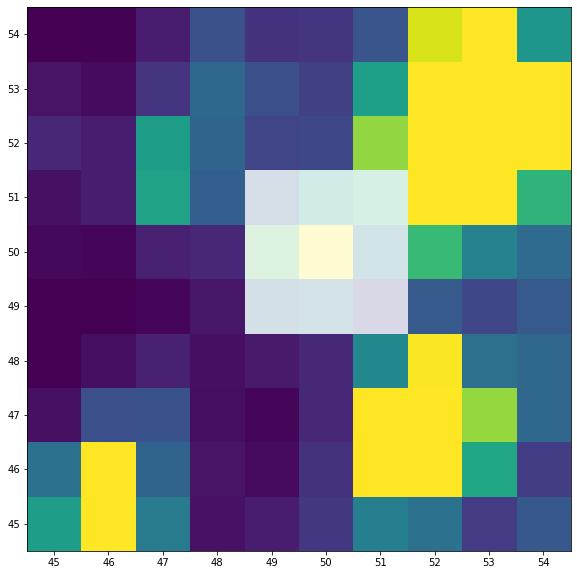

In [14]:
sn2.set_aperture(rowrange=[49, 52], colrange=[49, 52])
sn2.plot_cutout(rowrange=[45, 55], colrange=[45, 55], show_aperture=True)

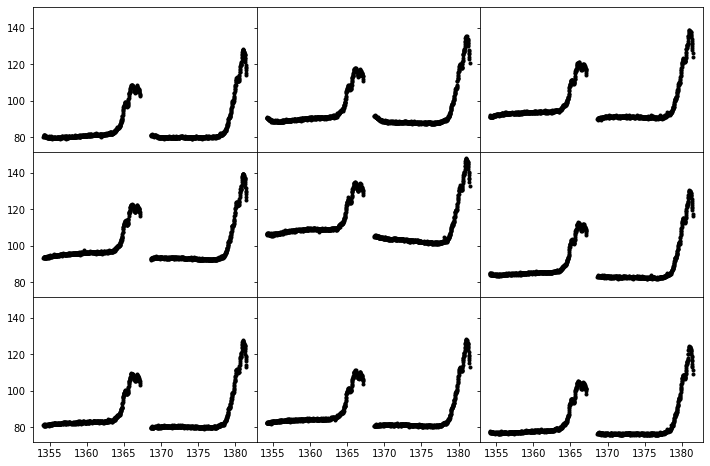

In [15]:
sn2.plot_pix_by_pix(data_type="raw")

In [16]:
sn2.add_cpm_model()
sn2.add_poly_model()
sn2.set_regs([0.001, 0.1])
sn2.holdout_fit_predict(k=50);

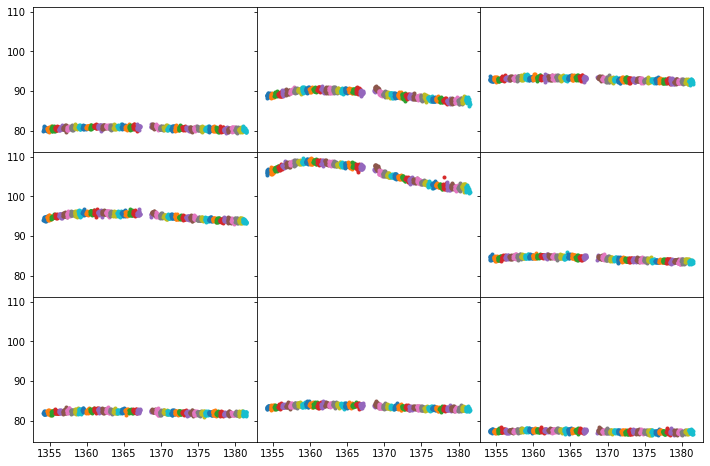

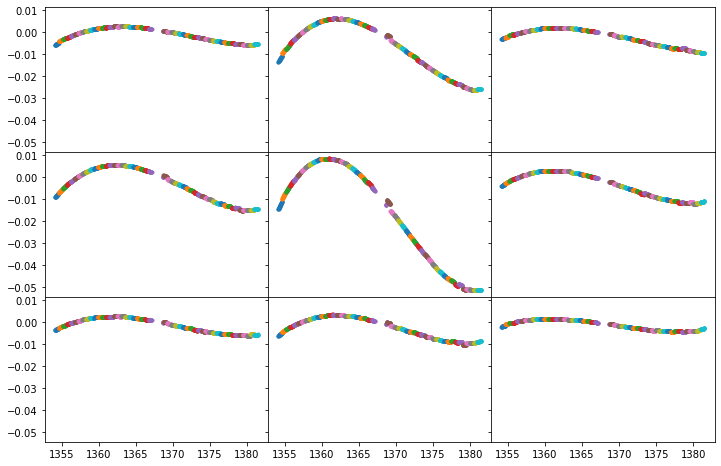

In [17]:
sn2.plot_pix_by_pix(data_type="rescaled_cpm_subtracted_flux", split=True)
sn2.plot_pix_by_pix(data_type="poly_model_prediction", split=True)

In [18]:
lc = sn2.get_aperture_lc(data_type="rescaled_cpm_subtracted_flux")

Summing over 3 x 3 pixel lightcurves


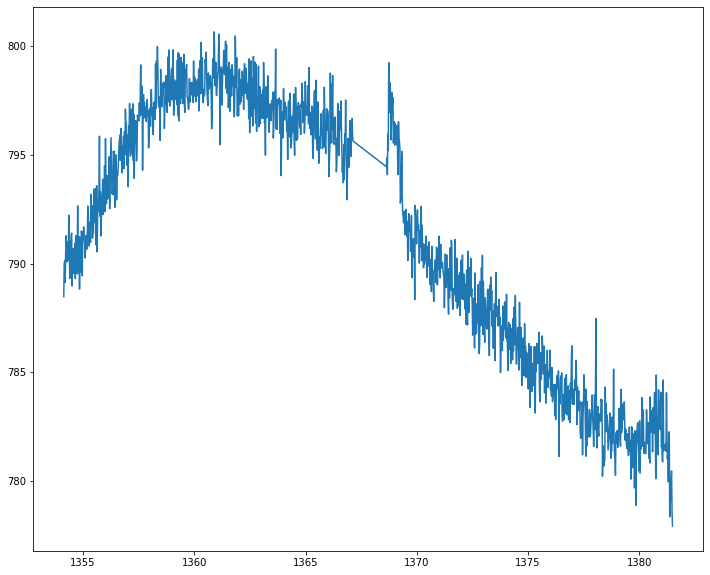

In [19]:
plt.plot(sn2.time, lc)

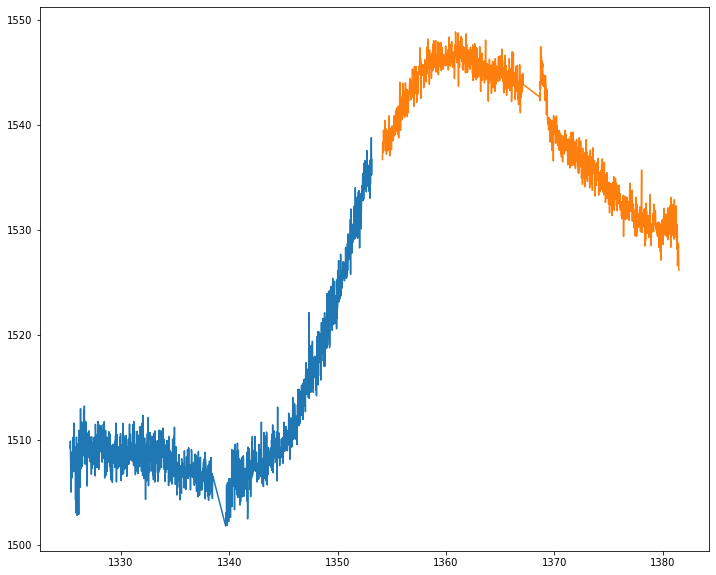

In [20]:
plt.plot(sn.time, apt_lc)
plt.plot(sn2.time, lc + np.abs(apt_lc[-1] - lc[0]))

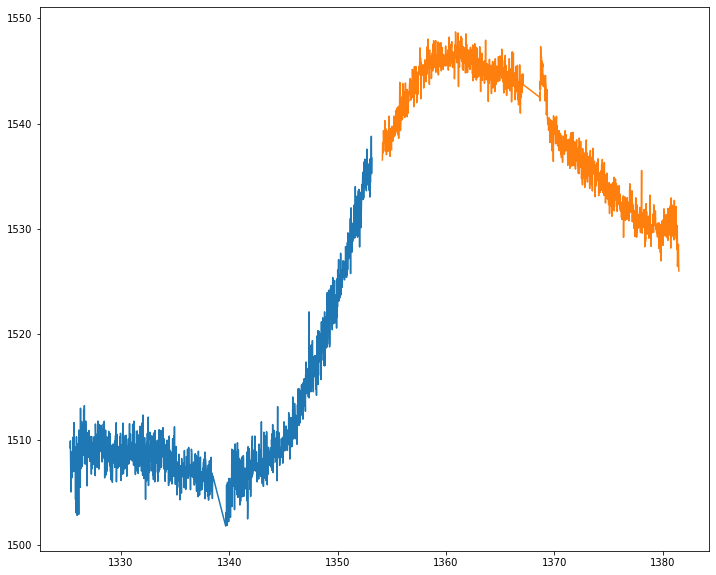

In [21]:
diff, st_time, st_lc = tess_cpm.utils.stitch_sectors(sn.time, sn2.time, apt_lc, lc)
plt.plot(sn.time, apt_lc)
plt.plot(sn2.time, lc + diff)

In [22]:
# ASAS-SN 19bt
file_sec7 = "supernovae/tess-s0007-4-1_105.047542_-66.040322_64x64_astrocut.fits"
file_sec8 = "supernovae/tess-s0008-4-1_105.047542_-66.040322_64x64_astrocut.fits"
file_sec9 = "supernovae/tess-s0009-4-1_105.047542_-66.040322_64x64_astrocut.fits"

Removing 7 bad data points (out of 1093) using the TESS provided QUALITY array


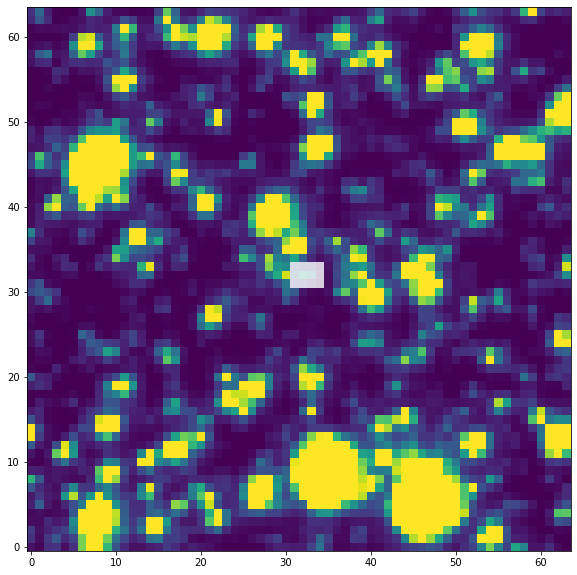

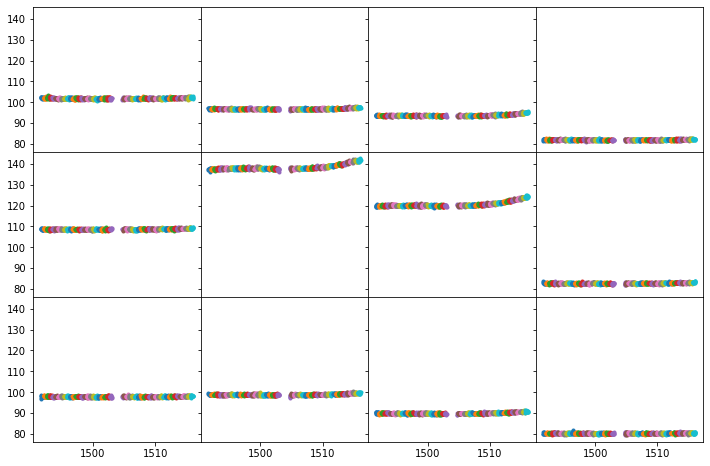

Summing over 3 x 4 pixel lightcurves


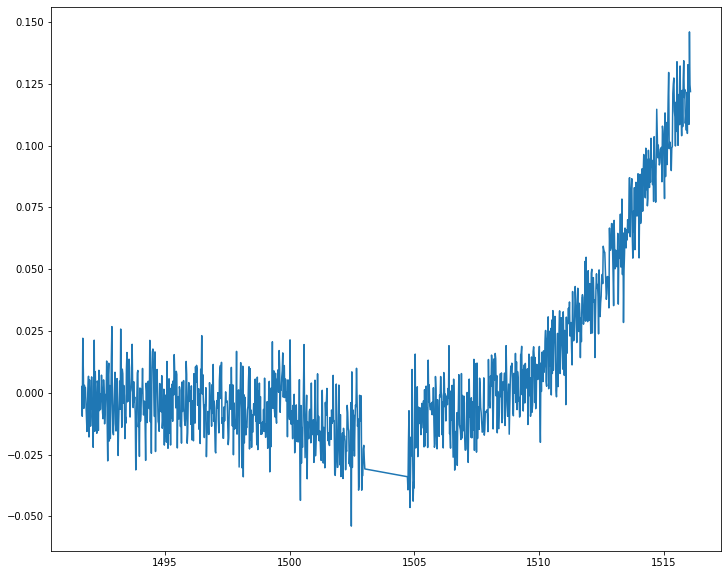

In [28]:
sec7 = tess_cpm.Source(file_sec7, remove_bad=True)
sec7.set_aperture(rowrange=[31, 34], colrange=[31, 35])
sec7.plot_cutout(show_aperture=True)
sec7.add_cpm_model()
sec7.add_poly_model()
sec7.set_regs([0.01, 0.1])
sec7.holdout_fit_predict(k=50);
sec7.plot_pix_by_pix("rescaled_cpm_subtracted_flux", split=True)
sec7_lc = sec7.get_aperture_lc("cpm_subtracted_flux")
plt.plot(sec7.time, sec7_lc)

Removing 16 bad data points (out of 968) using the TESS provided QUALITY array


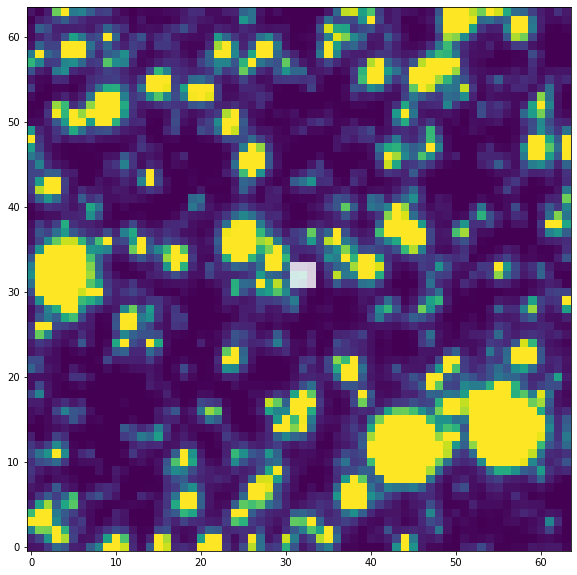

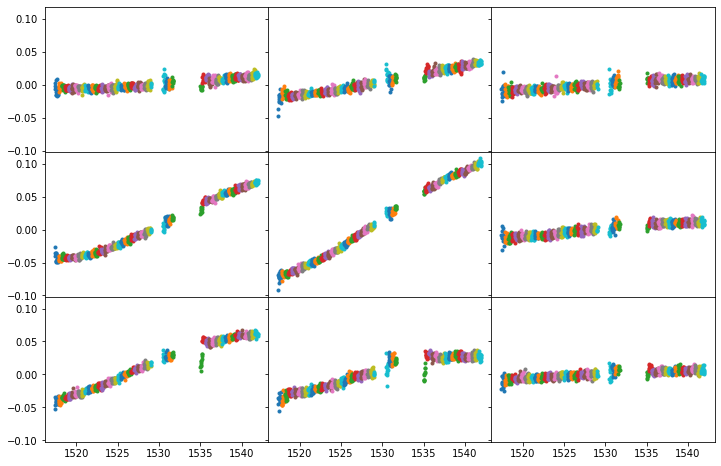

Summing over 3 x 3 pixel lightcurves


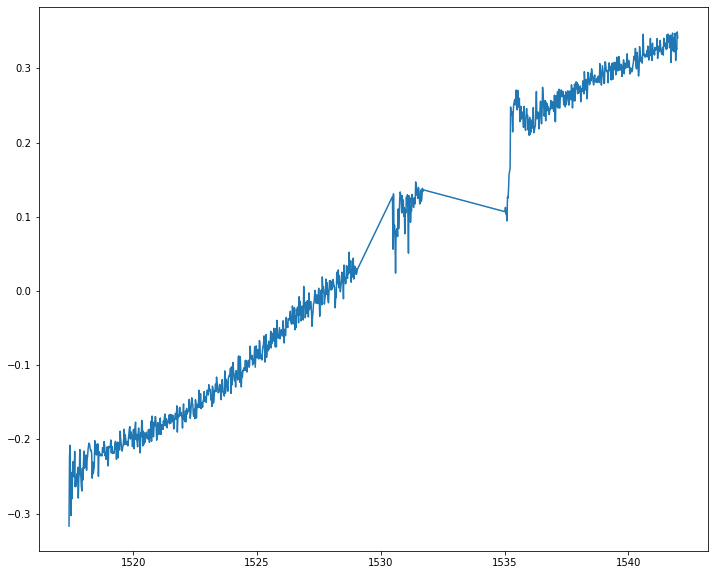

In [29]:
sec8 = tess_cpm.Source(file_sec8, remove_bad=True)
sec8.set_aperture(rowrange=[31, 34], colrange=[31, 34])
sec8.plot_cutout(show_aperture=True)
sec8.add_cpm_model()
sec8.add_poly_model()
sec8.set_regs([0.01, 0.1])
sec8.holdout_fit_predict(k=50);
sec8.plot_pix_by_pix("cpm_subtracted_flux", split=True)
sec8_lc = sec8.get_aperture_lc("cpm_subtracted_flux")
plt.plot(sec8.time, sec8_lc)

Removing 69 bad data points (out of 1154) using the TESS provided QUALITY array


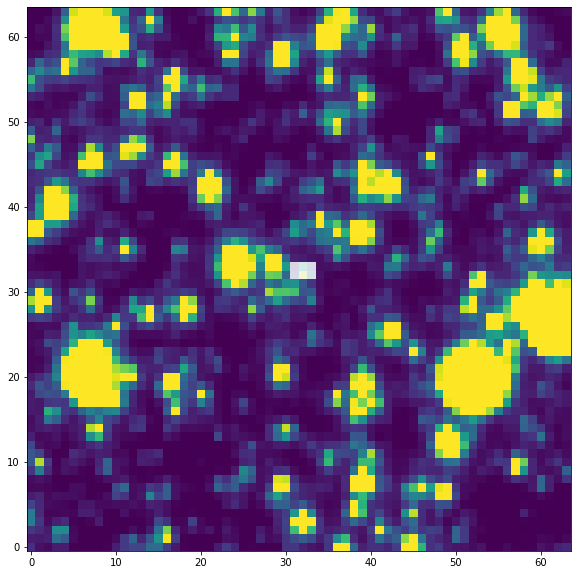

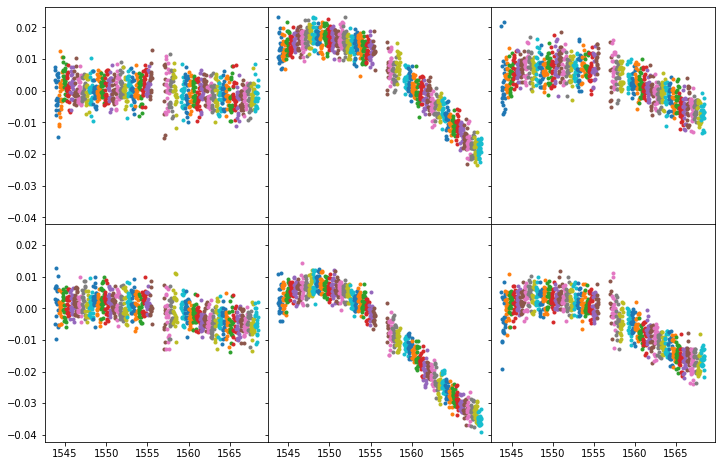

Summing over 2 x 3 pixel lightcurves


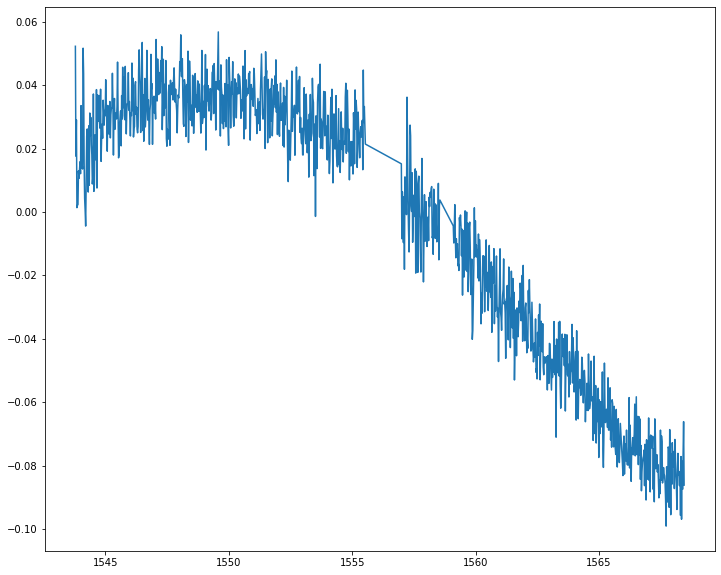

In [30]:
sec9 = tess_cpm.Source(file_sec9, remove_bad=True)
sec9.set_aperture(rowrange=[32, 34], colrange=[31, 34])
sec9.plot_cutout(show_aperture=True)
sec9.add_cpm_model()
sec9.add_poly_model()
sec9.set_regs([0.01, 0.1])
sec9.holdout_fit_predict(k=50);
sec9.plot_pix_by_pix("cpm_subtracted_flux", split=True)
sec9_lc = sec9.get_aperture_lc("cpm_subtracted_flux")
plt.plot(sec9.time, sec9_lc)

In [31]:
diff, stitched_time, stitched_lc = tess_cpm.utils.stitch_sectors(sec7.time, sec8.time, sec7_lc, sec8_lc, 100)
diff2, stitched_time2, stitched_lc2 = tess_cpm.utils.stitch_sectors(stitched_time, sec9.time, stitched_lc, sec9_lc, 100)

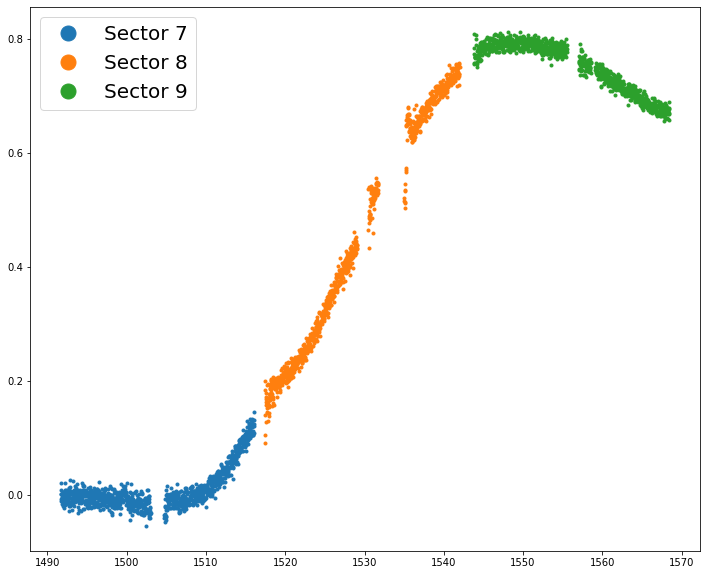

In [42]:
# plt.plot(stitched_time2, stitched_lc2, ".", c="gray", alpha=0.4)
plt.plot(sec7.time, sec7_lc, ".", c="C0", label="Sector 7")
plt.plot(sec8.time, sec8_lc+diff, ".", c="C1", label="Sector 8")
plt.plot(sec9.time, sec9_lc+diff2, ".", c="C2", label="Sector 9")
plt.legend(fontsize=20, markerscale=5)